# Proyecto de agrupación de clientes

In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
clientes_raw = pd.read_csv(r"..\data\raw\customer_segmentation.csv")
clientes = clientes_raw.copy()

In [43]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [44]:
clientes.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [45]:
clientes['Dt_Customer'] = pd.to_datetime(clientes['Dt_Customer'], format ='%d-%m-%Y')

In [46]:
clientes['AcceptedCmp1'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp2'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp3'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp4'] = clientes['AcceptedCmp1'].astype('category')
clientes['AcceptedCmp5'] = clientes['AcceptedCmp1'].astype('category')

In [47]:
clientes['Complain'] = clientes['Complain'].astype('category')
clientes['Response'] = clientes['Response'].astype('category')
clientes['Education'] = clientes['Education'].astype('category')
clientes['Marital_Status'] = clientes['Marital_Status'].astype('category')



In [48]:
clientes['ID'] = clientes['ID'].astype('category')

In [49]:
#Validando si existen ID's repetidos
clientes[clientes.duplicated(subset='ID', keep= False)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [50]:
clientes[clientes.isna().any(axis = 1)]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    2013-11-15       11         5  ...                  7             0   
27    2013-02-20       19         5  ...                  1             0   
43    2013-11-05       80        81  ...                  2             0   
48    2014-01-01       96        48  ...                  6             0   
58    2013-06-17       57        11  ...                  6             0   
71    2012-09-14       25        25  ...                  8             0   
90    2012-11-19        4       230  ...                  9             0   
91    2014-05-27       45         7  ...                  7             0   
92    2013-11-23       87       445  ...                  1             0   
128   2013-07-11       23       352  ...                  6             0   
133   2013-08-11       96       231  ...                  4             0   
312   2013-06-03       69       861  ...                  3             1   
319   2013-08-23       67       738  ...                  7             1   
1379  2013-04-01       39       187  ...                  5             0   
1382  2012-09-03       87        19  ...                  5             0   
1383  2014-01-12       49         5  ...                  7             0   
1386  2014-03-02       17        25  ...                  7             0   
2059  2013-05-18       52       375  ...                  3             0   
2061  2013-05-31       82        23  ...                  6             0   
2078  2013-03-03       82        71  ...                  8             0   
2079  2013-06-23       83       161  ...                  6             0   
2081  2013-10-18       95       264  ...                  7             0   
2084  2013-10-30       75       532  ...                  1             0   
2228  2012-08-12       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [51]:
clientes.groupby(by=['Education'])['Income'].mean()

C:\Users\glori\AppData\Local\Temp\ipykernel_4504\3777795359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes.groupby(by=['Education'])['Income'].mean()


Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [52]:
clientes['Income']= clientes['Income'].fillna(clientes.groupby(by=['Education'])['Income'].transform('mean'))

C:\Users\glori\AppData\Local\Temp\ipykernel_4504\2008916126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes['Income']= clientes['Income'].fillna(clientes.groupby(by=['Education'])['Income'].transform('mean'))


In [53]:
#sns.pairplot(clientes)

In [54]:
cpal = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)

<Axes: >

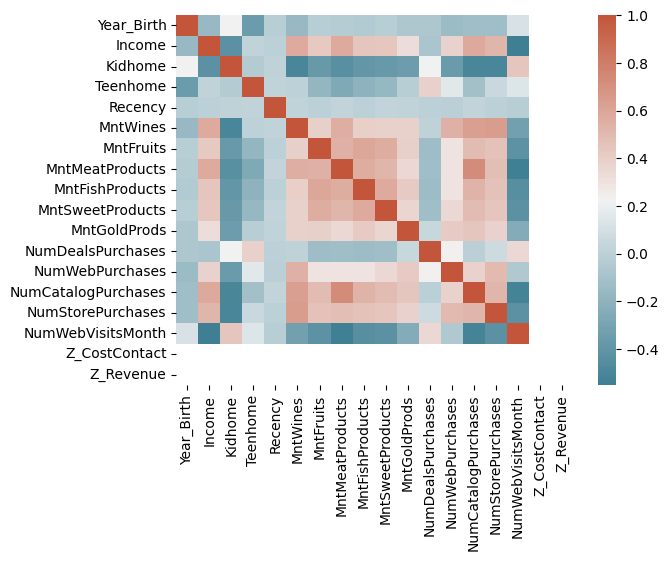

In [55]:
sns.heatmap(clientes.select_dtypes(include=np.number).corr(), cmap= cpal)

In [56]:
clientes.Z_Revenue.value_counts()
clientes.Z_CostContact

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

Las columnas Z_Revenue y Z_CostContact son elementos constantes, y debido a ello no representan ninguna ingerencia o correlación con las demás variables. Por ende se eliminarán dichos campos.

In [57]:
for column in clientes.select_dtypes(exclude=np.number).columns:
    print(clientes[column].value_counts())


ID
11096    1
11092    1
11091    1
11088    1
11086    1
        ..
17       1
13       1
9        1
1        1
0        1
Name: count, Length: 2240, dtype: int64
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
2012-08-31    12
2014-05-12    11
2013-02-14    11
2012-09-12    11
2014-05-22    10
              ..
2013-11-01     1
2013-08-10     1
2012-10-11     1
2012-12-20     1
2014-01-09     1
Name: count, Length: 663, dtype: int64
AcceptedCmp3
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp4
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp5
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp2
0    2096
1     144
Name: count, dtype: int64
Com

In [61]:
clientes = clientes[~clientes['Marital_Status'].isin(['Alone', 'Absurd','YOLO'])]

In [62]:
clientes['AcceptedCmp1'].equals(clientes['AcceptedCmp2'])

True

In [63]:
clientes['AcceptedCmp2'].equals(clientes['AcceptedCmp3'])

True

In [64]:
clientes['AcceptedCmp3'].equals(clientes['AcceptedCmp4'])

True

In [65]:
clientes['AcceptedCmp4'].equals(clientes['AcceptedCmp5'])

True

Todas las variables son iguales, de ahí que se decide dejar sólo una de ellas.

In [69]:
clientes = clientes.drop(['AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue'], axis=1)

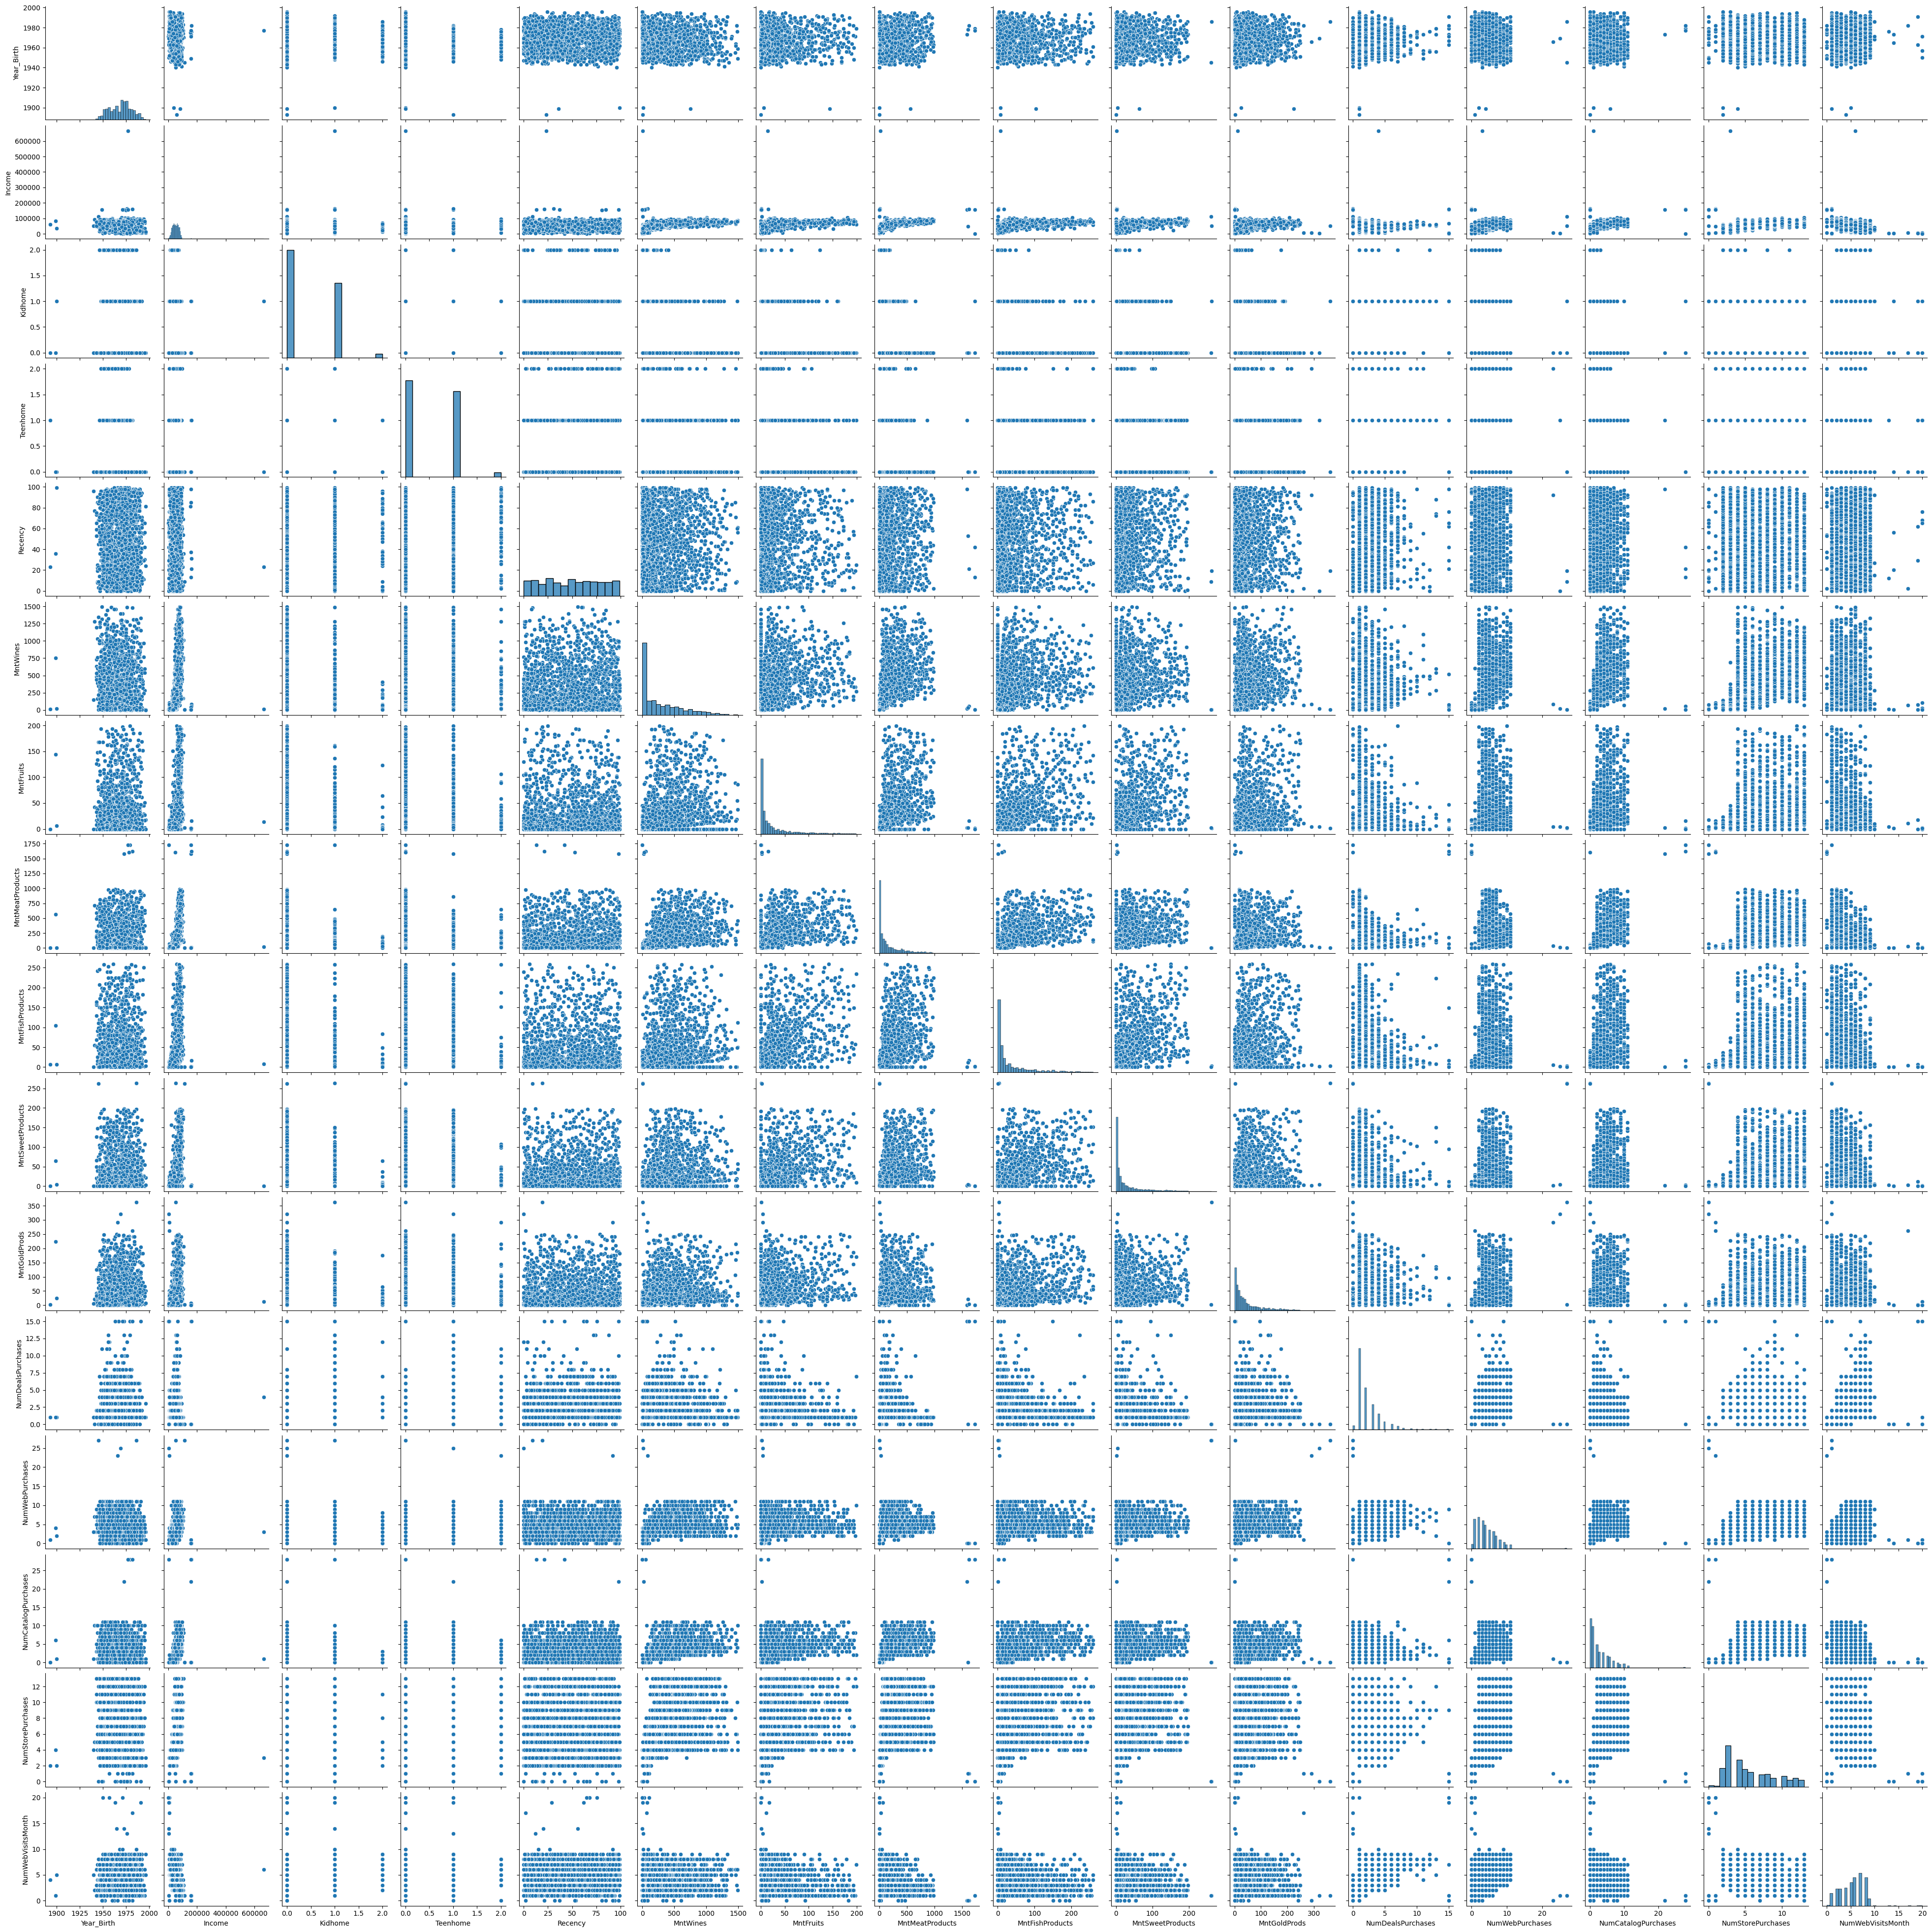

In [70]:
sns.pairplot(clientes.select_dtypes(np.number))